### K-core analysis

A k-core of a graph G is a **maximal connected subgraph of G in which all vertices have degree at least k.** Equivalently, it is one of the connected components of the subgraph of G formed by repeatedly deleting all vertices of degree less than k. If a non-empty k-core exists, then, clearly, G has degeneracy at least k, and the degeneracy of G is the largest k for which G has a k-core.

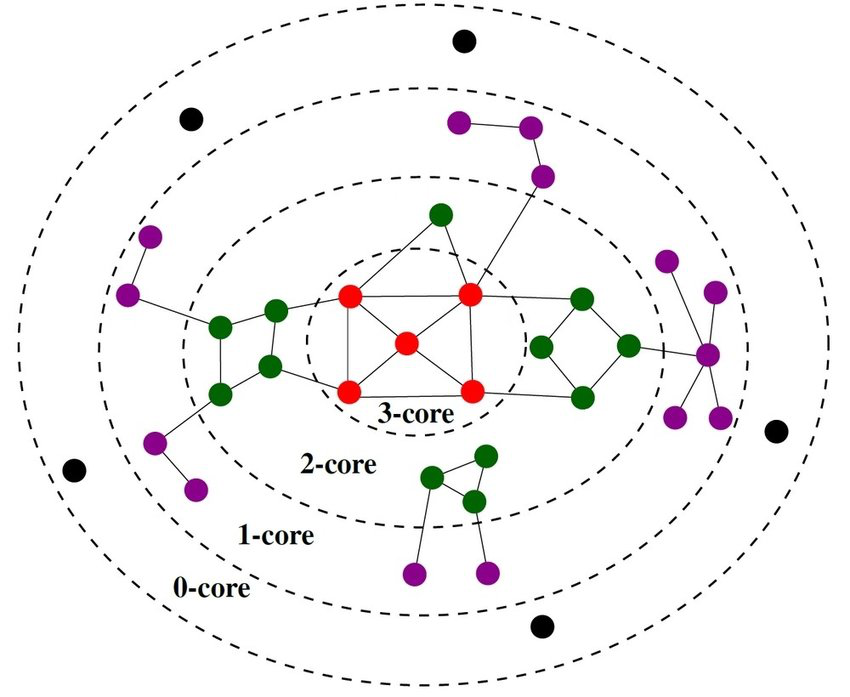

In [35]:
from IPython.display import display
from PIL import Image

path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\k-core.jpg"
display(Image.open(path))

### Example

In [1]:
import pandas as pd
import networkx as nx
import unicodecsv as csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from operator import itemgetter

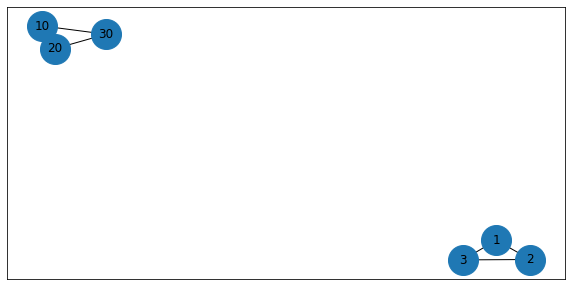

In [2]:
G = nx.Graph([(1,2),(1,3),(2,3)])
G.add_edges_from([(10,20),(10,30),(20,30)])

plt.figure(figsize=(10,5))
nx.draw_networkx(G, with_labels=True, arrows=True, node_size = 900)

In [3]:
# print k-core nodes
nx.k_core(G,k=2).nodes()

NodeView((1, 2, 3, 10, 20, 30))

In [4]:
# print k-core edges
nx.k_core(G,k=2).edges()

EdgeView([(1, 2), (1, 3), (2, 3), (10, 20), (10, 30), (20, 30)])

In [5]:
# If you want them as separate subgraphs you can find the connected components:
graphs = nx.connected_components(nx.k_core(G,k=2))
for g in graphs:
    print(g)

{1, 2, 3}
{10, 20, 30}


### Example

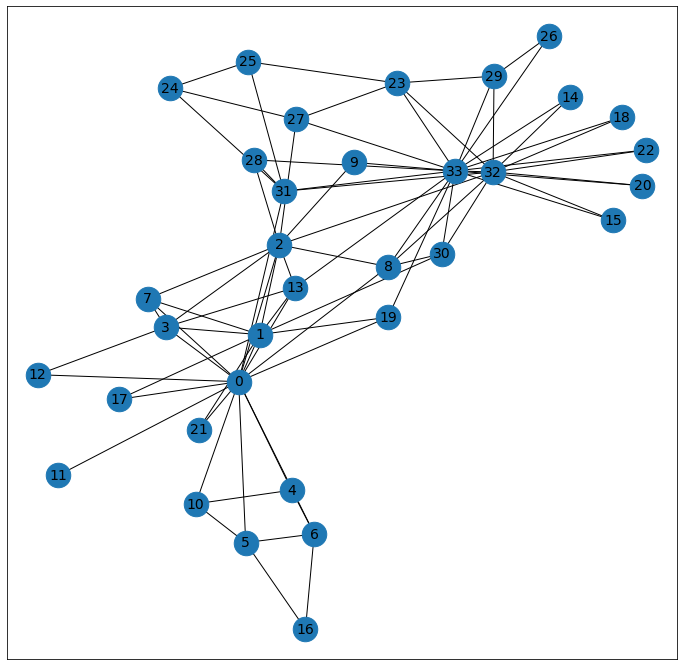

In [15]:
G = nx.karate_club_graph()
plt.figure(7,figsize=(12,12))
nx.draw_networkx(G,node_size=600,font_size=14)

In [16]:
list(nx.k_core(G,k=4).nodes())

[0, 1, 2, 3, 32, 33, 7, 8, 13, 30]

In [17]:
list(nx.k_core(G,k=4).edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 7),
 (0, 8),
 (0, 13),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 13),
 (2, 32),
 (3, 7),
 (3, 13),
 (32, 8),
 (32, 30),
 (32, 33),
 (33, 8),
 (33, 13),
 (33, 30),
 (8, 30)]

In [20]:
counter = 0
graphs = (G.subgraph(c) for c in nx.connected_components(nx.k_core(G,k=2)))
for g in graphs:
    print (g.nodes()) # print nodes
    print (g.edges()) # print edges
    counter = counter + 1
print (counter)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
1


### Example

In [38]:
data_path = 'C:/projects/datasets/facebook_combined.txt'
G_social = nx.read_edgelist(data_path)

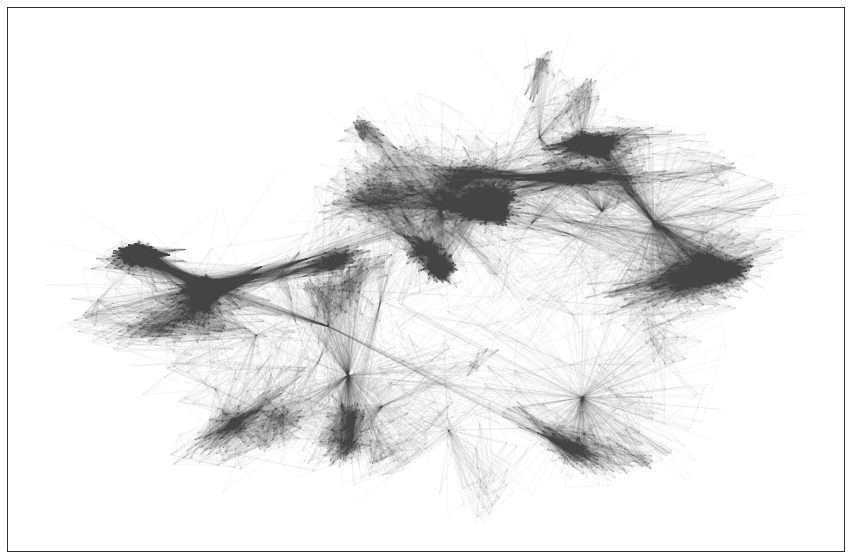

In [41]:
# To get an idea, let’s render it:

pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)
plt.show()

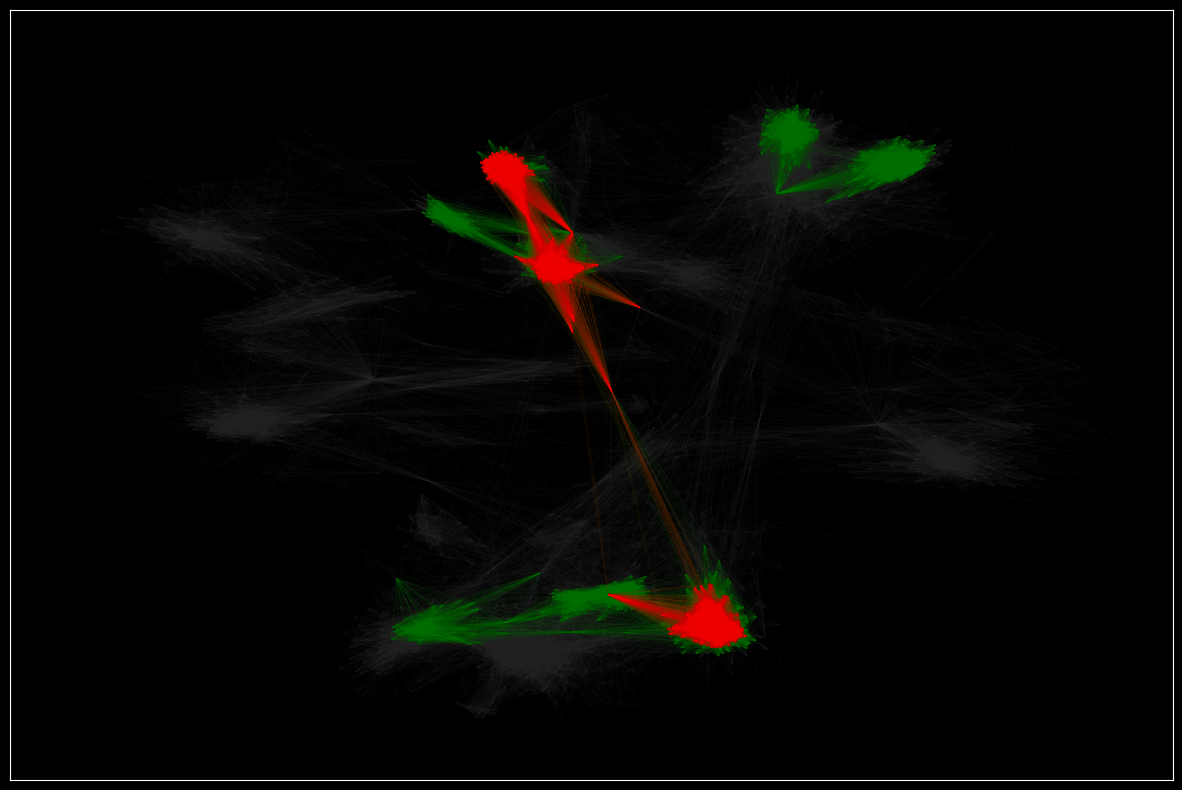

In [5]:
# cores with at lest degree 30
G_core_30 = nx.k_core(G_social, 30)

# similarly, with at least degree 60
G_core_60 = nx.k_core(G_social, 60)

# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

pos = nx.spring_layout(G_social, k=0.1)

nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_30, pos=pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_60, pos=pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)
plt.show()